## **Five simple datastructures in Python**

---
A data structure is a structure for the organisation, management, and storage of data. The choice of data structure determines the efficiency, correctness, and testability (ease of) of programs. 
Python knows many data structures, from simple to very complex. However despite the built-in riches, most junior & medior programmers will opt for the list as data structure, the list is flexible and knows an application programming interface (API) full with useful methods. However, the list is often not the right choice as data structure it isn't even the "Pythonic" choice (recommended by Python itself) for data structure that would be the tuple. 

What data structure you should use depends on what you want to achieve with that data structure. For instance, if needs to be fast, should the data structure only contain unique elements, should the content of your data structure never change, you want to able to order the elements fast, or store it in a specific order? These are the type of questions you need to ask yourselves while make a choice of data structure. You've probably guessed it, but a list is the wrong answer to all these questions.   

This notebook will discuss the five easiest data structure Python has. Give you an understanding when to use them and when not. The simple datastructures that all Python programmers should know are in order of discussion & complexity:
 1. set 
 2. tuple
 3. list 
 4. array 
 5. dictionary

All five are a direct or indirect subclass of the collections class https://docs.python.org/3/library/collections.html. Set is a direct subclass, tuple, list, and array are subclasses of Sequence (to quote Luciano Ramalho of FPY: Python loves sequences) and dictionary is a subclass of Mappings.


#### **an example of the five structures**

In [ ]:
s = {1,2,3,4,5}
s

In [ ]:
t = (1,2,3,4,5)
t

In [ ]:
l = [1,2,3,4,5]
l

In [ ]:
from array import array 
a = array('i', [1,2,3,4,5])
a

In [ ]:
d = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5}  
d

#### **Set and generators**
A set is an unordered collection of unique elements. It is the simplest of the five datastructures, it is a subclass of Collection, but not of Reversable. Consider that a set is unordered it is of course obvious that we cannot reverse it.

From set theory we know set notation {1,2,3} and we know how to generate sets. Sets can be generated from different sets e.g. {x^2| x $ \in $ {1..5}} = {1,4,9,16,25}. A set generator consists of three parts:
 1. Allocation: x^2 in our example
 2. The generator: x in {1..5} 
 3. The guard: x % 2 == 1 (a guard is optional)
 
generator = {allocation| generator, guard}

Python gives us the near enough the same notation for its generator.

In [ ]:
s = (n**2 for n in {1,2,3,4,5})
s

If I use brackets without any form of cast, I get a generator object back.

There are in two ways of casting, to get a useful structure back.
 1. Explicit cast. 
 2. Using a comprehension.
 
See the examples below. 

In [ ]:
set(s)

In [ ]:
s = {n**2 for n in range(1,6)}
s

In [ ]:
type(s)


Only lists and set can use a comprehension. A comprehension is basically enclosing the generator with the brackets of  a certain type. Python uses those brackets to perform a cast of sorts. Obviously, this will not work for a tuple, as the brackets are the same as for the generic generator.

In [ ]:
t = (n for n in range(1,100000000000001) if n < 11)
t

Back to sets, the elements of a set do not have to be of the same type.

In [ ]:
s = {3, 'a'}
s

As you know functions are first class citizens in Python, they too can be part of a set.

In [ ]:
s = {1+2, 'a'}
s

order doesn't matter in sets

In [ ]:
s1 = {'a', 3}
s == s1

Although the sets are the same mathematically, for Python they are different objects.

In [ ]:
s is s1

Uniqueness of the elements does matter.

In [ ]:
s = {1+2, 3, 'a', 'a', 'a'}
s

`set` inherits many of its methods from Collections, so do list, tuple and array, and they have several special methods in common, for instance:
 - The special method to have the length returned; `__len__`, callable buy the function `len()`
 - Check of an element is part of the collectionable; `__contains__`, callable by the `in`-operator.
 - Sum all elements in the collection; `__sum__`, callable by `sum`, if and only if summing makes sense give the type of the elements in the collection.
 
At the end of the notebook there is a graph of the collections API.

In [ ]:
s = {n**3 for n in range(11) if n % 2 == 0}
s

In [ ]:
len(s)

In [ ]:
sum(s)

In [ ]:
7 in s

In [ ]:
216 in s

Sets are mutable using methods as:
 - `set.add(e)`
 - `set.remove(e)`
 - `set.update(collection)`
 
Where `e` is an element, and `collection` is a collection of elements, not limited to a set.

In [ ]:
s = {1,2,3,4,5}
s.add(789)
s

In [ ]:
s.remove(3)
s

In [ ]:
l = [n for n in range(5) if n % 2 != 0] 
l

In [ ]:
s.update(l) # updating s with list l
s


Set knows all the mathematical set operations, for instance intersection (see the api https://docs.python.org/3/library/collections.abc.html?highlight=set#collections.abc.Set).

In [ ]:
s.intersection_update({3, 87, 789, 999})
s

#### **The subclasses of the Sequence interface**
Three of the five data structures are a subclass of sequence.  A sequence (arrays, list, tuples) is an enumerated collection of objects in which repetitions are allowed and order does matter. In order of discussion, they are:
 1. Tuple
 2. List
 3. Array

#### **Tuple**
Tuples are Python's primary choice of datastructure, they serve several purposes:
 1. Immutable list
 2. Record
 3. Named Tuple 

#### **Immutable lists with tuples**
The Pythonic manner of programming with a sequence is to program using tuples, not lists. Yes lists are flexible and easy in use but they introduce a whole new class of problems. Problems that are common and difficult to debug e.g., the problem of changing and disappearing elements. There is nothing to guard the elements of a list being changed or removed, this creates problems when the same list is being used by multiple developers at different locations in programs. If one developer depends on a value of an element in a list and another developer in different location removes the element or changes the value of that element, a bug has been introduced. One that is notoriously difficult to debug or discover during testing.

Immutable lists prevent this by simply not allowing change, see this explanation of MIT https://web.mit.edu/6.005/www/fa15/classes/09-immutability/. Tuple is Python's version of immutable list. They have to other 2 specific advantages besides being less prone to bugs: 
 1. Tuples are faster in use see https://stackoverflow.com/questions/68630/are-tuples-more-efficient-than-lists-in-python/22140115#22140115 (Raymond Hettinger is a core developer of Python) 
 2. More important tuples allow for local reasoning. You don't need to know the global context (every value of every element in the program at a certain time). This ensures that programs can be better tested, maintained, and scaled.


In [ ]:
immutable = tuple(x for x in range(20) if x % 2 ==1)
immutable

In [ ]:
immutable[1]

You cannot assign to a tuple, nor can you add to it, nor pop it.

In [ ]:
immutable[1] = 4

In [ ]:
immutable.add(34)

In [ ]:
immutable.pop()

But of course tuples have the collection interface methods, callable with the following functions:
 1. `len`
 2. `sum`
 3. `in`

In [ ]:
len(immutable)

In [ ]:
sum(immutable)

In [ ]:
17 in immutable


But what if I do want to use part of the tuple? Well you use the tuple to generate a new tuple with the value(s) you want, the original tuple will stay the same. In fact, we can use a tuple to generate any collectionable.

In [ ]:
small = tuple(n for n in immutable if n <9)
small

In [ ]:
type(small)

We can use a tuple to generate a set.

In [ ]:
small_set = set(n for n in immutable if n < 9)
small_set

or a list.

In [ ]:
small_list = [n for n in immutable if n < 9]
small_list


Perhaps you have noticed there is something odd when generating a list; I didn't use the `list()` function,  where I used `set()` and `tuple()`.

For lists Python created a special generator called a list comprehension. Of course, you could use the `list()` function, and perhaps should to stay consistent, this up to you. 

In [ ]:
small_list_ex = list(n for n in immutable if n < 9)
small_list_ex


Unfortunately, tuples are not really immutable. If an element of the tuple is mutable, then it is also mutable within a tuple. I think it is often perplexing for developers to see this in action.

In [ ]:
really = (1,2,[3,4],5)
really 

In [ ]:
really[2][1] = 7
really

With hash(tuple) you can check of all elements of your tuple are immutable. This is of course a trick, only primitives are hashable.

In [ ]:
hash(really)

In [ ]:
hash(immutable)

#### **Tuples as records**
Tuples are usable as records as in a database record, by using tuple as a record you can use variable allocation or pattern matching to get a value.

In [ ]:
# using variable allocation
country, capital, language, population = ('The Netherlands', 'Amsterdam', 'Dutch', '18.000.000')
country

In [ ]:
# using pattern matching
country, _, _, population = ('The Netherlands', 'Amsterdam', 'Dutch', '18.000.000')
population

Of cou,rse you could use indexing but that is simply inferior.

In [ ]:
x =  ('The Netherlands', 'Amsterdam', 'Dutch', '18.000.000')
x[0]

#### **Named Tuples**
The collections module knows the namedtuple. A namedtuple is a factory function that allows you to create tuple subclasses with named fields. It is akin to an algebraic data type (ADT), that is a type that is built from two or more types, https://en.wikipedia.org/wiki/Algebraic_data_type. A namedtuple is thus the cartesian product of two or more types, perhaps easiest understood as an object without any methods. 

Namedtuples are powerful in use with SQL see https://docs.python.org/3.9/library/collections.html?highlight=namedtuple#collections.namedtuple.While ADT's are a powerful concept in the design of data, and it allows for pattern matching (with some typical Pythonic oddities of course).

See the example.


In [ ]:
from collections import namedtuple
from random import choice

Card =namedtuple('Card',['rank', 'suit']) 

class Deck:
    ranks = [str(n) for n in range(2,11)] + list('JQKA') 
    suits = 'spades diamonds clubs hearts'.split()
    
    def __init__(self):
        self._cards = [Card(rank,suit) for rank in self.ranks for suit in self.suits] 
        
    def __len__(self)->int:
        return len(self._cards)
        
    def __getitem__(self, position)->Card:
        return self._cards[position]
        

In [ ]:
card = Card('7', 'clubs')
card

In [ ]:
card._fields

The named tuple has a `_make` class method that allows you to make named tuples if that type.

In [ ]:
c = {'7', 'hearts'}
Card._make(c)

Python does not enforce types which allows you to do strange things, also with named tuples.   

In [ ]:
strange_card = Card(3.14, 'George is a rhino!') 
strange_card

Card('7', 'clubs', 'diamonds') will trow a TypeError, which is a bit weird Python throws an error because you use to many arguments but not about type of that argument. Is this even a TypeError?

In [ ]:
type_error_card = Card('7', '8', 'clubs')
type_error_card

#### **Typing**
Python has the typing library that allows you to use type hints in your code. You can use type hints as formal comment on your code. By using type hints as such, you alleviate the necessity for most comment on functions and methods, leaving you with just commenting on your classes. 

If you take Haskell as an example, though not necessary, it is regarded as best practice to use function signatures:   

`sum :: Num a => [a] -> a`

This type of function signature is like a comment, I have a function named sum, if you give me a list of numeric types `a`, I will return a single object type of `a`. 

In Python you could write the following to have the same effect:

`def sum(l: list[int])->int:`.

Again, we have function named sum, it takes list l, a list of type int, and returns an int.

Typed function signatures are clearer, they function much better than trying to find only a name that describes what the function does, those names tend to get awfully long and opaque. Again, the necessity to document code becomes less. If you are a developer, you should be able to read these signatures.

The typing library also knows a NamedTuple, this one is more upto date and knows type hints. See the example below.

In [ ]:
import typing 

Coordinate = typing.NamedTuple('Coordinate', [('lat', float),('lon', float)])
typing.get_type_hints(Coordinate)

In [ ]:
ams_coordinates = Coordinate(52.370216, 4.895168) 
type(ams_coordinates.lat)

You could still abuse it, as types are not enforced in Python, they are hints after all.

If you want to enforce typing in Python you need an external type checker like MyPy, see https://mypy.readthedocs.io/en/stable/.

In [ ]:
ny_coordinates = Coordinate('George','is a rhino!')
ny_coordinates.lat + ' ' +  ny_coordinates.lon 

The named tuples from collections and typing come with several useful methods see https://docs.python.org/3.9/library/collections.html?highlight=namedtuple#collections.namedtuple.

In [ ]:
from collections import namedtuple  

City = namedtuple('City', ['name', 'country', 'population', 'coordinates']) 
paris_data= ('Paris', 'France', 11.132, Coordinate(48.8534100, 2.3488000))
paris = City._make(paris_data) # _make() useful if you need to make a lot of named tuples from a csv file or so
paris

In [ ]:
paris.coordinates

In [ ]:
paris.coordinates.lat

In [ ]:
p = paris._asdict() # the ._asdict() converts your named tuple to a dictionary
p

#### **namedtuple and SQL/CSV**
Named tuples are especially useful for assigning field names to result tuples returned by the csv or sqlite3 modules. You can move in one step, from data from  an SQL or CSV to a Python class.

`import sqlite3`

`conn = sqlite3.connect('/companydata')`    
`cursor = conn.cursor()`    

`City = namedtuple('City', ['name', 'country', 'population', 'coordinates'])`     
`cursor.execute('SELECT name, country, population, ccordinates, FROM cities')`    
`for city in map(City_make, cursor.fetchall()): print(city.name, city.population)`

#### **Unpacking tuples (and other subclasses of Sequence)**
Python has several ways to unpack tuples, lists and arrays: 
 1. Indexing
 2. Pattern matching & variable assignment
 3. The start operator `*`
 
I will treat indexing and slicing (being a form of indexing) as known. 
 

In [ ]:
ams_coordinates = (52.370216, 4.895168)
ams_coordinates[0]

#### **pattern matching & variable assignment**
Pattern matching can be used to obtain partial information. Pattern matching in Python uses an `_` the underscore is a dummy variable, or wild card.
Working with pattern matching is worth the exercise, eventually once being used to the process, you will not want to turn back.


In [ ]:
lattitude, longitude = ams_coordinates
lattitude

In [ ]:
nl_info = ('The Netherlands', 'Amsterdam', 'Dutch', '18.000.000')
name,_,_,population = nl_info 
print(f'{name} has a population of {population}.')

#### **The `*`-reference** 
The star reference comes to Python from C. The `*`-reference refers to the memory location of variable, it is a pointer.
  
Let me give a few examples. You can use it in a function like `divmod`.

In [ ]:
t = (20,8)
divmod(*t)

You can unpack multiple elements with the `*`-reference. You can do this because we look at a memory address. 

In [ ]:
a, b, *rest = range(5)
a, b, rest

In [ ]:
rest

You can use the `*`-reference in the beginning or the middle too, but you would need a bit of pattern matching or variable assignment.

In [ ]:
_, *body, _, _ = range(10)
body

In [ ]:
*head, _, _, _ = range(10)
head

In [ ]:
tup = tuple(range(10))
*head,b,c,d
head

In [ ]:
head,b

In a function call you can even use the `*`-reference multiple times.  

In [ ]:
def func(a,b,c,d,*rest):
    return a,b,c,d,rest

func(1,2,3,*range(4,7))

In [ ]:
func(*[1,2],3,*range(4,7))

You can use the `*`-reference to quickly create a collection, remember it is pointer to memory location. 

If create a collection we just fill that location, you will have to signal the last element in that memory location, the last element of your collection.

In [ ]:
immutable_list = *range(1,5),5
immutable_list

In [ ]:
mutable_list = [*range(1,5),5]
mutable_list

A tuple is smaller in memory than a list, this because there needs to be no over allocation. A tuple won't grow in size.

In [ ]:
import sys

f'the size of the tuple is {sys.getsizeof(immutable_list)} bytes, the size of the list is {sys.getsizeof(mutable_list)} bytes.'

#### **List**
The list datastructure is easy in use and very flexible. This explains why it the datastructure of choice for junior and medior Python developers. That choice is not a consequence of thought, but one of lack of thought. Not considering what data structure to use leads to easy avoidable mistakes, and inefficiencies in memory use, and speed. Don't get me wrong I have nothing against the list, it is very useful, but you must have reasons why you use a list.

What I can do with a tuple I can do with a list (and more obviously).

In [ ]:
[lattitude, longitude] =  [52.370216, 4.895168]
lattitude

In [ ]:
nl_info_list = list(nl_info)
nl_info_list

In [ ]:
[name,_,_,population] = nl_info_list
name,population

list has a host of functions not defined for the immutable tuple.

In [ ]:
l1 = [*range(1,10),10]
l1

In [ ]:
l1.append(11)
l1

In [ ]:
l2 = l1
l2

In [ ]:
l2.pop()
l2

In [ ]:
l1

#### **Aliasing in lists**
I have accidentally changed `l1`, to quote Marvin Gaye: 'What's going on'. By writing assigning `l2 = l1` I have created an alias. Both `l1` and `l2` share the same memory location, as a cause of this `l1` changes when `l2` changes. I have written a notebook on programming concepts where I expound on this, for now it is enough to know that you shouldn't use assignment `=` but the `copy()` method of a list.

Unfortunately, this will make only a shallow copy. If you have a storable like a list as an element of your list, you need to use `deepcopy()` again the reasons for this are explained in some detail in the programming concepts notebook.

In [ ]:
l2=l1.copy()
l2

In [ ]:
l2.append(666)
l2

Now `l1` and `l2` are different objects, with a different location in memory.

In [ ]:
l1 

In [ ]:
l2.pop()
l2==l1

If you want to know if different objects are alliasses (share their location in memory) you need to use the `is`-operator.

In [ ]:
l2 is l1

list isn't just a subclass of sequence but also of reversible.

In [ ]:
l2.reverse()
l2

In [ ]:
s = set(n for n in range(1,11))
s

Do you think set is a subclass of reversible too? 

In [ ]:
s.reverse()

If this answer surprises you consider if reversability make sense given the definition of a set?

Is tuple reversable?

In [ ]:
t = tuple(n for n in range(1,11))
t

In [ ]:
t.reverse()

Of course not, reversing the order is mutating the tuple tuples are immutable.

List is popular exactly because we can mutate it, reverse it, and sort it. The very same reasons that list is such a popular data structure are also the cause why you should not trust lists. Lists are major causes of faults in Python.


#### **sort versus sorted**
Python knows two sorting methods/functions that differ in detail:

 1. The function `sorted` creates a new list that it fills with the sorted elements of the old list, it returns the new list. Usually this is what you want to use, as the old list is being kept.
 2. The method `sort()` sorts in-place meaning that it doesn't return a list it returns `None` and that the original list is gone for ever.
 
The function `sorted` takes any iterable as input and returns a list. You can therefore use a tuple or set as argument.

In [ ]:
l4 = [5,3,7,2,1,10,9,8,4]
sorted(l4)

In [ ]:
l4

In [ ]:
t4 = tuple(n for n in l4)
t4

In [ ]:
sorted(t4)

It is important to remeber that if I use the function `sorted`, a list is returned even if the input is a tuple.

In [ ]:
t4 

#### **Sort**
sort is a method of the list API. `list.sort` sorts in place, meaning no new list is created, the list that you sort on has changed irreversibly. One reason to use `sort()` is that it is slightly more efficient in use.

Not all iterables (things you can iterate over) have implemented their own `sort()`, set and tuple have not. You can implement sort on the iterable you've created yourself though. See the StructuredProgramming notebook on how to create your own iterables.

In [ ]:
l4

In [ ]:
l4.sort() # l4 has changed for ever
l4 

Sorting is an important subject see https://docs.python.org/3/howto/sorting.html for more on sorting.

List comprehension can be used to filter and map (not reduce), they are very apt at creating cartesion products, but also for creating list of lists. Say you want to program tic-tac-toe.

In [ ]:
bord = [['-'] *3 for i in range(3)]
bord

In [ ]:
bord[1][1] = 'X'
bord

In [ ]:
bord[0][1] = 'O'
bord

However, if you want to do serious operations on your list of lists a.k.a matrices, I suggest you use SymPy or NumPy

In [ ]:
from sympy import * #pip install sympy

A = Matrix([[1,2],
            [3,4]])
A

In [ ]:
A.T

#### **Array** 
*"A list is the most common iterable and most similar to arrays in C"*  https://pythongeeks.org/iterables-in-python/.

What the quote says is painfully wrong, Python lists are nothing like C arrays and is the most common iterable in Python for it has all the flexibility a C array lacks. There is a  lesson to learn; Where you get your information from, can you trust that source. The internet is filled with sources of information. They are attractive, for most times free. Unfortunately, there are many mistakes on those websites, and sometimes even outright nonsense as the above quote.

If you have questions about Python, use the Python doc as your first choice of information. Books are good, a computer scientist usually writes them. Not a user of a programming languages, that often know a lot of the features of a language, but often lack the deep theoretical understanding of the concepts of programming languages. Furthermore, books and Python doc are rigorously edited, mistakes will be removed. Many free websites lack that rigour. (Python doc has rigour).

A C array like a Python array (Python actually use the CPython array, which is the C array) follows closely the von Neumann Architecture (https://en.wikipedia.org/wiki/Von_Neumann_architecture). An array wants an adjacent block of memory. That's why you have to specify the length of your array (implicit this is Python after all). You also have to specify the type of the elements your array will be using. Finally, you can only use primitive types like integers or float, no composite types as lists.

If you want to know, the Python list looks like a C linked-list, but then again all lists in imperative languages do (Haskell's list does not, it is a recursive data structure).


In [ ]:
from array import array

a = array('i', [1,2,3,4,5]) # i == int and length comes from your second argument
a

Arrays are fast and efficient because of the manner in which they are ported on physical memory.

In [ ]:
len(a)

In [ ]:
a.append(6)
a

In [ ]:
a.pop()
a

In [ ]:
a[2]

In [ ]:
a.index(3)

So why not always use array? 

Well because they are inflexible and wieldy in use. For instance, you cannot have multiple types in array, in fact you can only have numeric types see https://docs.python.org/3/library/stdtypes.html. You can't endlessly expand arrays without losing the benefit of adjacent memory blocks. When you create an array of say five elements, the compiler assigns a free block of memory that is bigger than you asked for, say enough to house 10 elements. This to allow for some flexibility. However, after the 11th element is added the compiler will either have to assign a new memory block to the array with all elements or add another not adjacent memory block. The former is expensive the latter loses you the advantage of adjacent memory.

So, when to use an array? Use it if you have a large number (and I mean large at least a few million) of numeric values you want to do operations on, then you can really make use of the speed an array has to offer.


#### **NumPy & SymPy**
If you need to work with large numbers of numerical values  or do actual math you should really be working with the Numeric Python library NumPy or the Symbolic Python library (for all your algebra) SymPy.

Both have amazingly fast arrays, which are encoded close to the hardware layer and will give a C array a run for its money on speed.

See https://numpy.org/doc/stable/reference/generated/numpy.array.html and/or #### https://docs.sympy.org/latest/index.html.


In [ ]:
import numpy as np #pip install numpy

a1 = np.array([1,2,3,4,5])
a1



With numpy arrays you can work with complex numbers.

In [ ]:
a2 = np.array([1,2,3], dtype=complex)
a2

Sympy is symbolic, meaning that SymPy allows you to work with mathematical variables (which have no assignment of course).

In [ ]:
from sympy import Array

a3 = Array([1,2,3,4,5])
a3

In [ ]:
from sympy.abc import x,y,z

a4 = Array([x**3, x*y, z])
a4

In [ ]:
a4.diff(x)

#### **Dictionaries**
The last of the easy datastructures, one that Python uses a lot internally, is the dictionary. Dictionaries are collections of key/value mappings. Dictionary is then also not a subclass of sequence but of mapping.

A dictionary (usually shortened to dict)  has the following structure { key : value }. Dictionaries can easily be created by generators. 

In [ ]:
d1 = { k:v for (k,v) in [(1,'a'),(2,'b'),(3,'c')]}
d1

Be a bit careful how you use a generator to create dicts they might contain a somewhat surprising result.

In [ ]:
d2 = { key:value for key in range(1,11) for value in range(100,110)}
d2

In [ ]:
d2 = { key : value for (key,value) in zip([n for n in range(1,11)],[m for m in range(100,110)])} 
d2

#### **Zip** 
A zip is also a collection, meaning it a subclass is of the collection interface. Like all the other data structures I have talked about. The function `zip()` takes two iterables and returns a tuple, `zip()` stops as one of the iterators reaches its end. 

`zip` is your best friend when creating dicts, see https://docs.python.org/3/library/functions.html#zip.

You can use generators to iterate over dicts. 

In [ ]:
songs = ['movin on up', 'slip inside this house', 'don`t fight it, feel it', 'higher than the sun', 'inner fligt', 'Come together', 'loaded', 'damaged', 'i`m coming down', 'higher than the sun dub', 'shine like stars'] 
screamadelica = { key:value for (key,value) in zip([n for n in range(1,len(songs)+1)],songs) }
screamadelica

In [ ]:
{song for song in screamadelica.values() } 


Python knows a function to create dictionaries `dict()` it either takes an interable with tuples, or it could also take a mapping, for instance a key/argument assignment.

In [ ]:
d4 = dict([('George','is a rhino!'),('Croc','is peckish!'),('Ente','Hallo Mädchen!'),('Rhino', 'Purple would look lovely on you')])
d4

In [ ]:
d4['George'] 

In [ ]:
d5 = dict(George='is a rhino!',Croc='is peckish!',Ente='Hallo Mädchen!',Rhino='the Pino')
d5

In [ ]:
d5['Croc'] 

In [ ]:
d5['Ente']

In [ ]:
class Example:
    
    def __init__(self):
        self.num = 10
        self.txt = 'Example class'

Python uses dictionaries to store namespaces of modules, global programs and objects. 

Below is an example of an objects instance attribute dictionary

In [ ]:
example = Example()
example.__dict__

#### **LIFO & FIFO**
There are many more datastructures in existance from simpele ones like a stack and queue to more complicated ones like heaps and splay trees. However, any Python programmer needs to be comfortable using the five in this notebook, it will make you a lot better programmer!

Once you know these data structures, you can build on this knowledge and create specialist datastructures for instance a stack and a queue.

In [ ]:
from dataclasses import dataclass, field
from typing import Any


@dataclass
class Stack: # a simple last in first out (LIFO) stack think a stack of plates 
    stack:list[Any] = field(default_factory = list)
    
    def append(self, value):
        self.stack.insert(0,value)
        
    def pop(self):
        try:
            return self.stack.pop(0)
        except IndexError:
            return 'trying to pop an empty stack'

    def __len__(self):
        return len(self.stack)
    
    def stack_print(self):
        for item in self.stack:
            print(item)
        

In [ ]:
stack = Stack()
stack.stack_print()

In [ ]:
stack.append(1)

In [ ]:
stack.append(2)

In [ ]:
stack.stack_print()

In [ ]:
stack.append(3)

In [ ]:
stack.stack_print()

In [ ]:
stack.pop()

In [ ]:
stack.stack_print()

In [ ]:
stack.pop()
stack.stack_print()

In [ ]:
stack.pop()
stack.stack_print()

In [ ]:
from dataclasses import dataclass, field

@dataclass
class Queue: # a simple first in first out (FIFO) queue (think telephone waiting queue)
    queue:list=field(default_factory=list)    
    
    def append(self,x):
        self.queue.append(x)
    
    def pop(self):
        if len(self.queue) != 0:
            self.queue.pop(0)
    
    def __len__(self):
        return len(self.queue)
    
    def queue_print(self):
        if len(self.queue) != 0:
            for item in self.queue:
                print(item)
        else:
            print('The waiting is finally over')
        

In [ ]:
q = Queue()
q.append(1)
q.append(2)
q.append(3)
q.queue_print()


In [ ]:
q.pop()
q.queue_print()


As you can see the difference between a stack and a queue is who gets out first. You can build upon a structure like this. You could for instance add a tuple with a number and a time stamp to your queue and tell people what number they are in the queue and how long they have been waiting.

#### **Containers**
As you hopefully realized by now these five datastructures are all containers. They store things. In general datastructures are storables, most are also iterable (in the sense that to be next has a meaning) and they have a size.

The Collection API is than also a a subclass of Iterable, Sized and Container classes. (Python does multiple inheritance). The Collection API looks like:

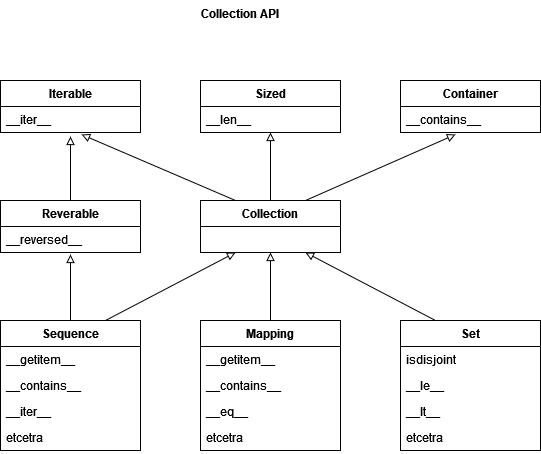